In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
concrete_data = pd.read_csv('Concrete_Data_Yeh.csv')
concrete_data.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
concrete_data.shape

(1030, 9)

In [6]:
concrete_data.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


Text(0, 0.5, 'csMPa')

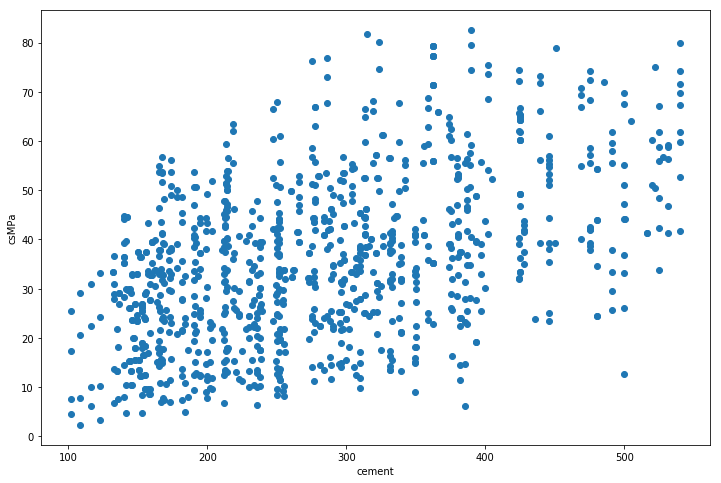

In [10]:
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(concrete_data['cement'], concrete_data['csMPa'])
plt.xlabel("cement")
plt.ylabel("csMPa")

Text(0, 0.5, 'csMPa')

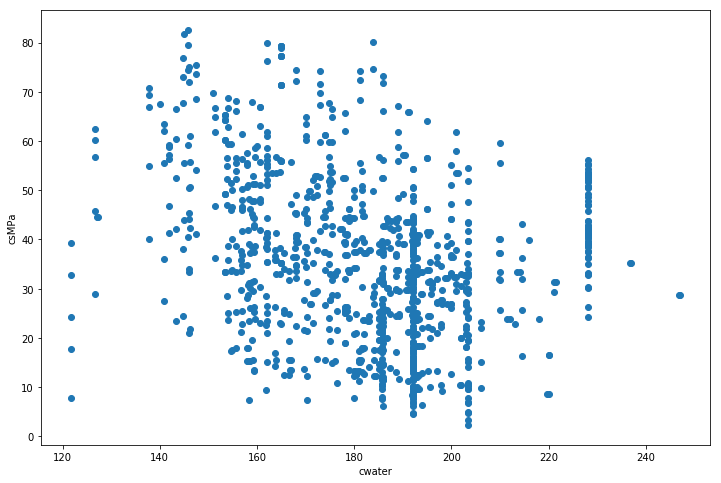

In [11]:
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(concrete_data['water'], concrete_data['csMPa'])
plt.xlabel("cwater")
plt.ylabel("csMPa")

Text(0, 0.5, 'csMPa')

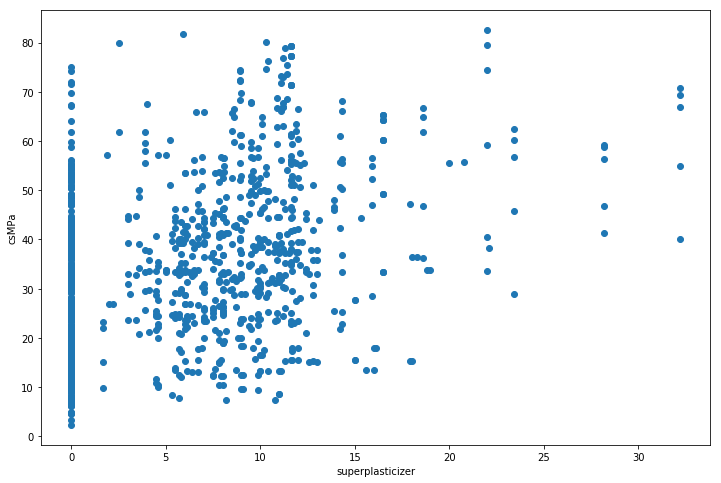

In [12]:
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(concrete_data['superplasticizer'], concrete_data['csMPa'])
plt.xlabel("superplasticizer")
plt.ylabel("csMPa")

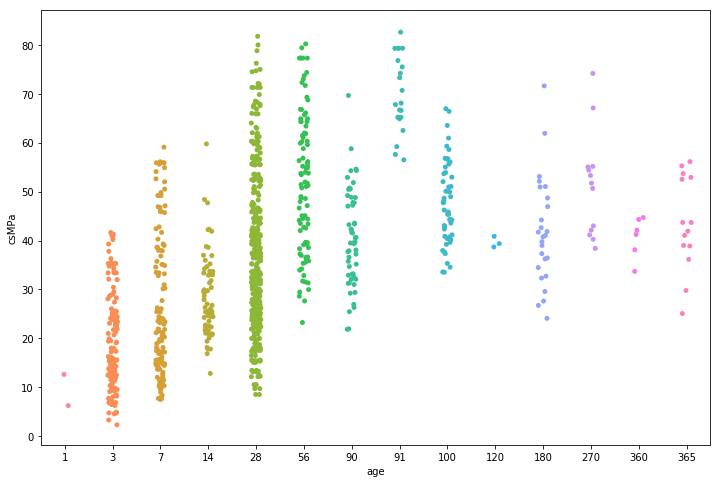

In [14]:
fig, ax = plt.subplots(figsize=(12,8))
sns.stripplot(concrete_data['age'], concrete_data['csMPa'])

In [15]:
concrete_data_corr = concrete_data.corr()
concrete_data_corr

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
flyash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseaggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineaggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
csMPa,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


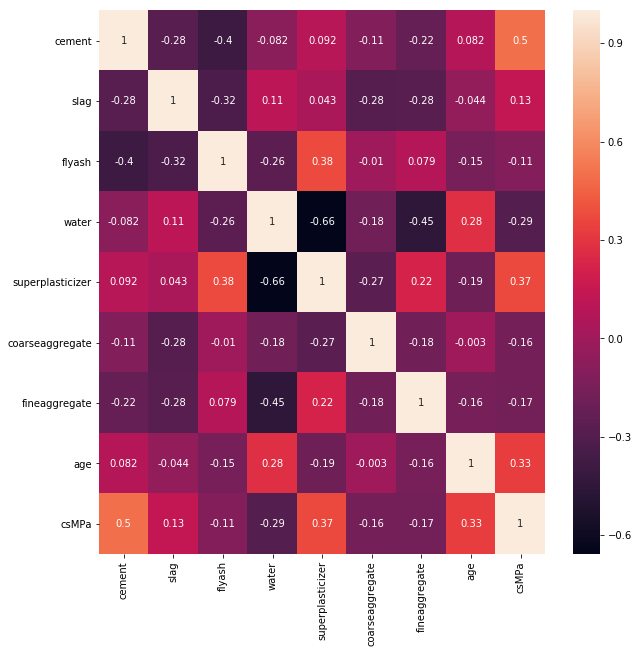

In [16]:
fig , ax = plt.subplots(figsize=(10,10))
sns.heatmap(concrete_data_corr, annot=True)

In [19]:
X = concrete_data.drop('csMPa', axis =1)
Y = concrete_data['csMPa']

In [21]:
from sklearn.model_selection import train_test_split
x_train ,x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [22]:
x_train.shape, x_test.shape

((824, 8), (206, 8))

In [23]:
y_train.shape, y_test.shape

((824,), (206,))

In [24]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

In [25]:
bag_reg = BaggingRegressor(DecisionTreeRegressor(),
                           n_estimators = 500,
                           bootstrap = False,
                           max_samples =1.0,
                           n_jobs =-1
                          )

In [27]:
bag_reg.fit(x_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         bootstrap=False, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=500, n_jobs=-1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [29]:
y_pred = bag_reg.predict(x_test)

In [31]:
df = pd.DataFrame({
    'Actual':y_test,
    'Predicted':y_pred,
})

df.sample(10)

,Actual,Predicted
628,12.25,19.38936
70,34.40,35.47200
463,56.06,56.33848
202,35.34,37.03148
129,71.30,71.30000
527,35.75,38.61000
565,14.84,18.91000
536,39.60,22.49000
292,43.50,46.26502
160,77.30,77.30000


In [33]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8734701599514013

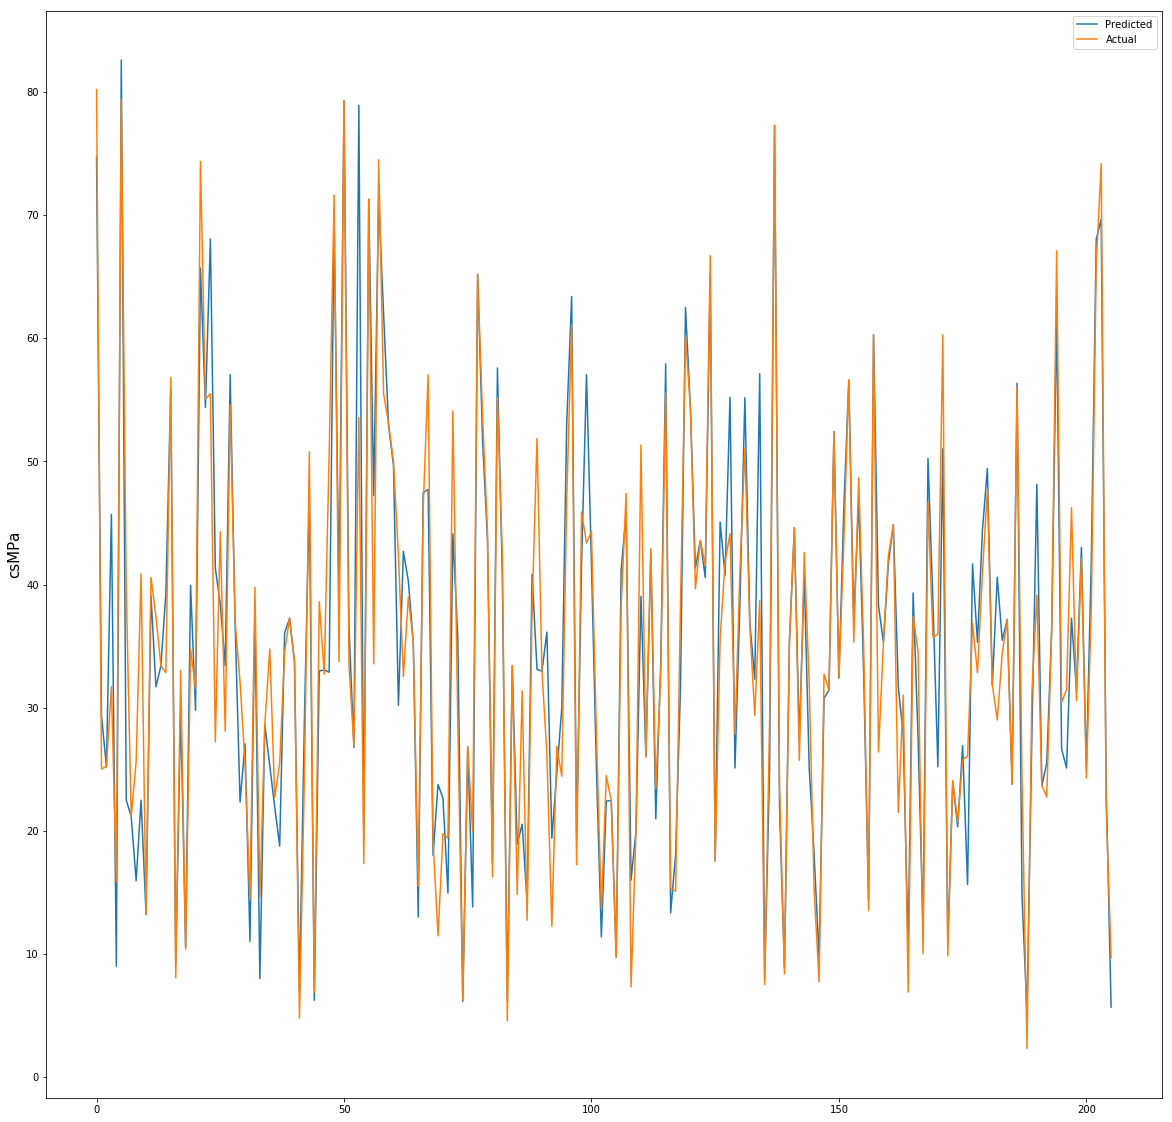

In [34]:
plt.figure(figsize=(20,20))
plt.plot(y_pred, label ='Predicted')
plt.plot(y_test.values, label ='Actual')

plt.ylabel('csMPa', fontsize=15)

plt.legend()
plt.show()

In [37]:
bag_reg = BaggingRegressor(DecisionTreeRegressor(),
                           n_estimators = 500,
                           bootstrap = True,
                           max_samples =0.8,
                           n_jobs =-1,
                           oob_score =True
                          )
bag_reg.fit(x_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=0.8, n_estimators=500, n_jobs=-1, oob_score=True,
         random_state=None, verbose=0, warm_start=False)

In [40]:
bag_reg.oob_score_

0.9055449918677039

In [41]:
y_pred = bag_reg.predict(x_test)
r2_score(y_test, y_pred)

0.9350931304649651